# **6. Multivariate and Tree-based Methods**

## **6.1 Multivariate EDA, and Principal Components Analysis**


**Principal components analysis (PCA)** is a useful tool for exploring multivariate data. It aims to condense the original variables into a smaller set of "principal components" that capture most of the variation in the data. The first principal component explains the most variation, followed by subsequent components that capture the remaining variation unexplained by previous components.

The **measure of variation** used in PCA is typically the sum of variances of the variables, which can be scaled to have variance one. Analyzing unscaled variables gives more weight to those with larger variances, while scaling to equal variances, equivalent to working with correlation matrices, provides equal importance to each variable. Logarithmic transformation is often applied to biological measurement data to standardize variability.

In the dataset "possum," consisting of nine morphometric measurements from 102 mountain brushtail possums across seven sites, examining scatterplot matrices is a good starting point. These plots can reveal any notable patterns or outliers in the data, such as differences between sites or sexes. Logarithmic transformation may not significantly alter the appearance of these plots if the range of values across variables is relatively small.

Overall, PCA helps in simplifying complex multivariate data while retaining most of the information, making it easier to identify patterns and relationships within the dataset.

Warning message in pairs.default(possum[, 6:14], col = palette()[as.integer(possum$sex)]):
“NAs introduced by coercion”


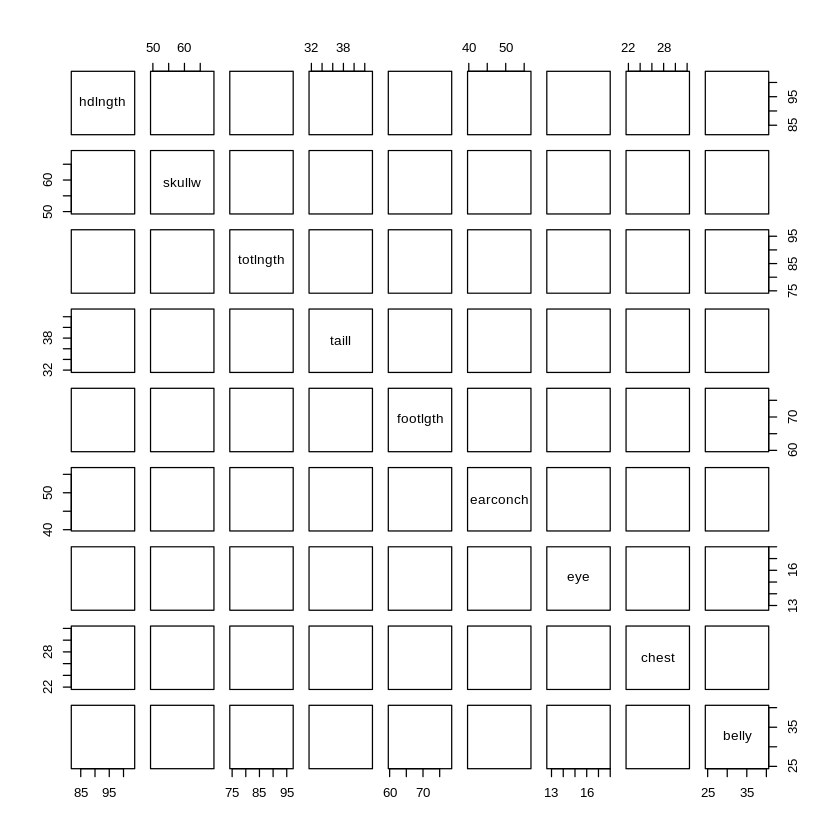

In [3]:
possum <- read.csv("/content/possum.csv")
pairs(possum[,6:14], col=palette()[as.integer(possum$sex)])


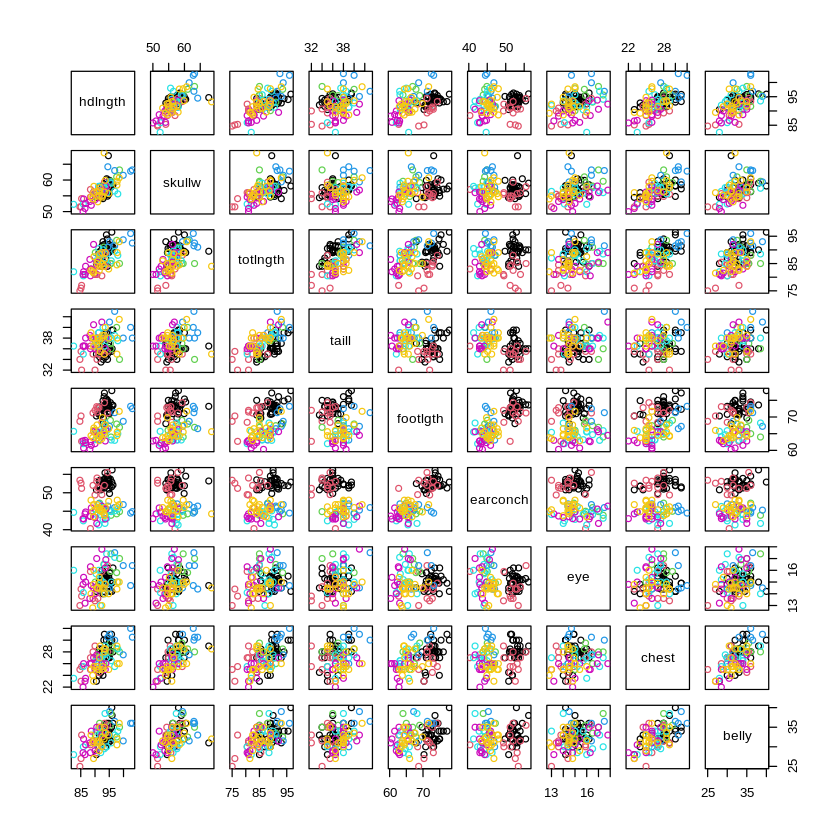

In [5]:
pairs(possum[,6:14], col=palette()[as.integer(possum$site)])


In [6]:
here<-!is.na(possum$footlgth) # We need to exclude missing values
print(sum(!here)) # Check how many values are missing

[1] 1


In [8]:
#We now look (Figure 21) at particular views of the data that we get from a principal components analysis:

possum.prc <- princomp(log(possum[here,6:14])) # Principal components

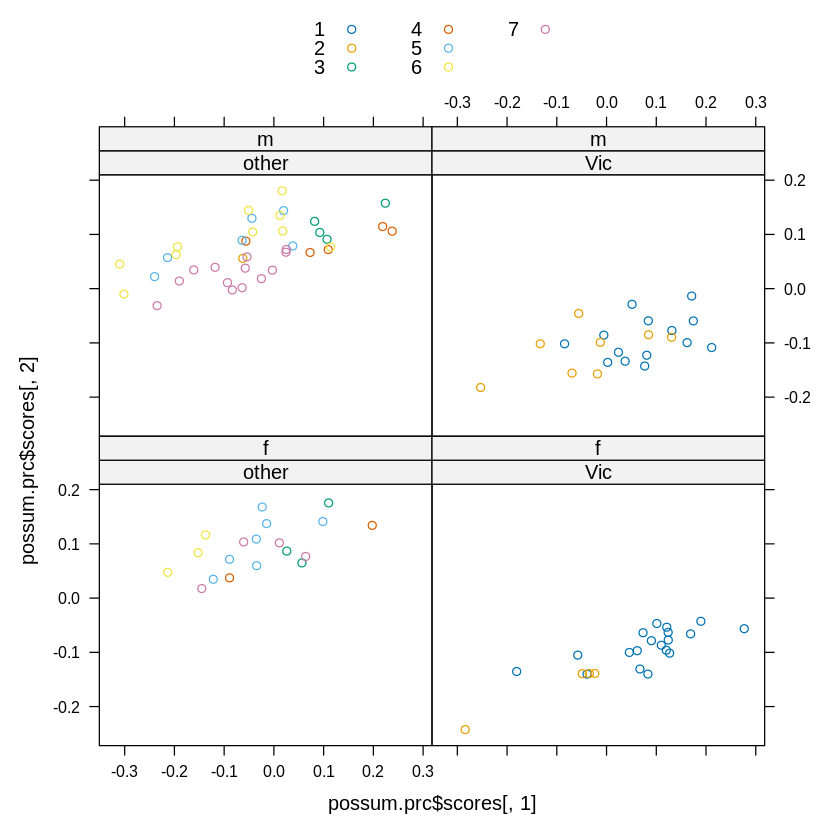

In [11]:
# Load the lattice package
library(lattice)

# Print scores on the second PC versus scores on the first PC,
# by populations and sex, identified by site
xyplot(possum.prc$scores[, 2] ~ possum.prc$scores[, 1] | possum$Pop[here] + possum$sex[here],
       groups = possum$site,
       auto.key = list(columns = 3))


## **6.2 Cluster Analysis**

Cluster analysis is a type of unsupervised classification where the clusters are not known beforehand. There are two main types of algorithms: hierarchical agglomeration and iterative relocation.

1. **Hierarchical Agglomeration**: Each observation starts as its own group. Similar groups are then merged successively, creating a hierarchical clustering tree. Eventually, a judgement is made on when to stop merging further.

2. **Iterative Relocation**: This algorithm starts with an initial classification and tries to improve it. The initial classification is often obtained using hierarchical agglomeration.

In R, you can perform cluster analysis using the `mva` package. The `dist()` function calculates distances between observations, `hclust()` performs hierarchical agglomerative clustering, and `kmeans()` implements k-means clustering through iterative relocation.

## **6.3 Discriminant Analysis**

Supervised classification involves predicting the group to which new data will belong based on previous classifications. For example, we may want to predict whether future patients will remain free of disease symptoms for twelve months or more, based on measurements and outcomes of previous patients.

In the context of the possum dataset, we're using the `lda()` function from the MASS package to see if we can distinguish animals from different sites based on morphometric measurements. A simpler classification is between populations, such as sites in Victoria versus sites in other states like New South Wales or Queensland. Since we're mainly interested in comparing variable values, we haven't taken logarithms of the data. Further discussion on this is provided below.

[1] 15.7578  3.9372  3.1860  1.5078  1.1420  0.7772

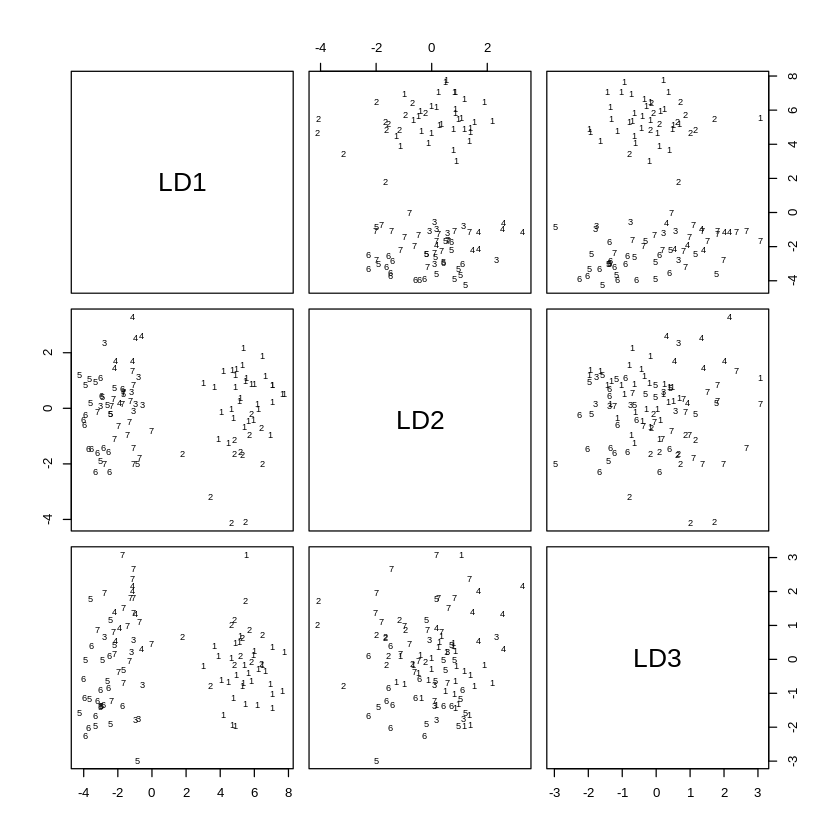

In [13]:
library(MASS) # Only if not already attached.
here <- !is.na(possum$footlgth)
possum.lda <- lda(site ~ hdlngth + skullw + totlngth +
                   taill + footlgth + earconch + eye + chest + belly,
                   data = possum, subset = here)
options(digits = 4)
possum.lda$svd # Examine the singular values
plot(possum.lda, dimen = 3)
# Scatterplot matrix for scores on 1st 3 canonical variates, as in Figure 22


The singular values represent the ratio of between-group to within-group sums of squares for each canonical variate. Larger singular values indicate greater discriminatory power in distinguishing between groups. Canonical variates beyond the third typically have minimal discriminatory power.

Using `predict.lda()`, we can obtain scores on the first few canonical variates.

Taking logarithms of biological measurement data can offer interpretative advantages. Allometric growth patterns, characterized by linear relationships between the logarithms of measurements, serve as a standard comparison. Differences between sites indicate variations in allometric growth patterns. Consider repeating the analysis using logarithms of measurements for further insights.

## **6.4 Decision Tree models (Tree-based models)**


Tree-based classification is a method used for multivariate supervised classification or discrimination tasks. It's also applicable for regression problems with a tree-based regression approach. While tree-based methods are well-suited for binary regression and classification, they may be less optimal for regression involving ordinal or continuous dependent variables.

Tree-based models, often referred to as "Classification and Regression Trees" (CART), are particularly effective when there's ample data available. One notable advantage of these methods is their automatic handling of non-linearities and interactions. The output typically includes a decision tree, which is directly applicable for making predictions.

Call:
rpart(formula = type ~ RI + Na + Mg + Al + Si + K + Ca + Ba + 
    Fe, data = fgl)
  n= 214 

       CP nsplit rel error xerror    xstd
1 0.20652      0    1.0000 1.0507 0.04955
2 0.07246      2    0.5870 0.6014 0.05165
3 0.05797      3    0.5145 0.5652 0.05102
4 0.03623      4    0.4565 0.5290 0.05026
5 0.03261      5    0.4203 0.5072 0.04973
6 0.01087      7    0.3551 0.5290 0.05026
7 0.01000      9    0.3333 0.5145 0.04991

Variable importance
Mg Al Ca Ba RI Na  K Si Fe 
18 16 15 14 13 10  8  5  2 

Node number 1: 214 observations,    complexity param=0.2065
  predicted class=WinNF  expected loss=0.6449  P(node) =1
    class counts:    70    76    17    13     9    29
   probabilities: 0.327 0.355 0.079 0.061 0.042 0.136 
  left son=2 (185 obs) right son=3 (29 obs)
  Primary splits:
      Ba < 0.335  to the left,  improve=26.04, (0 missing)
      Mg < 2.695  to the right, improve=21.53, (0 missing)
      Al < 1.775  to the left,  improve=20.04, (0 missing)
      Na < 14.06  to

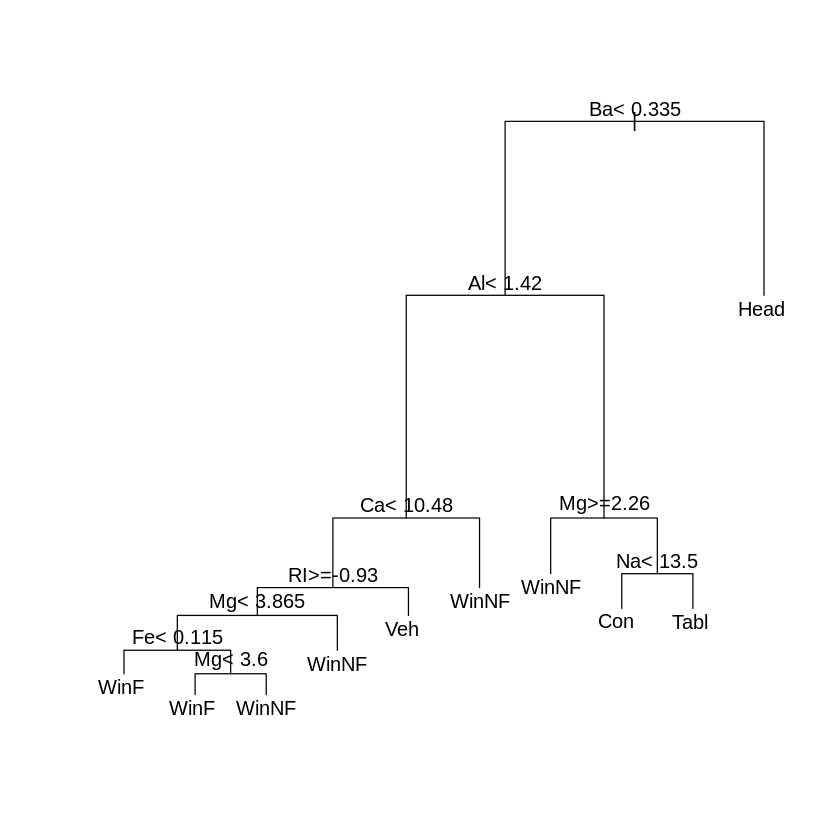

In [15]:
library(rpart)
# Use fgl: Forensic glass fragment data; from MASS package
glass.tree <- rpart(type ~ RI+Na+Mg+Al+Si+K+Ca+Ba+Fe, data=fgl)
plot(glass.tree); text(glass.tree)
summary(glass.tree)

To effectively use these models, understanding tree pruning and cross-validation is crucial. Methods for reducing tree complexity, based on significance tests at each node, often result in trees that over-predict.

The rpart package by Atkinson and Therneau for recursive partitioning is more aligned with CART than the S-PLUS tree library. It incorporates cross-validation into the tree formation algorithm.

## **6.5 Exercises**

1. Using the data set painters (MASS package), apply principal components analysis to the scores for
Composition, Drawing, Colour, and Expression. Examine the loadings on the first three principal
components. Plot a scatterplot matrix of the first three principal components, using different colours or symbols
to identify the different schools

             Comp.1  Comp.2  Comp.3
Composition  0.4835  0.3764  0.7838
Drawing      0.4240 -0.1872 -0.2797
Colour      -0.3808  0.8452 -0.2108
Expression   0.6644  0.3299 -0.5128


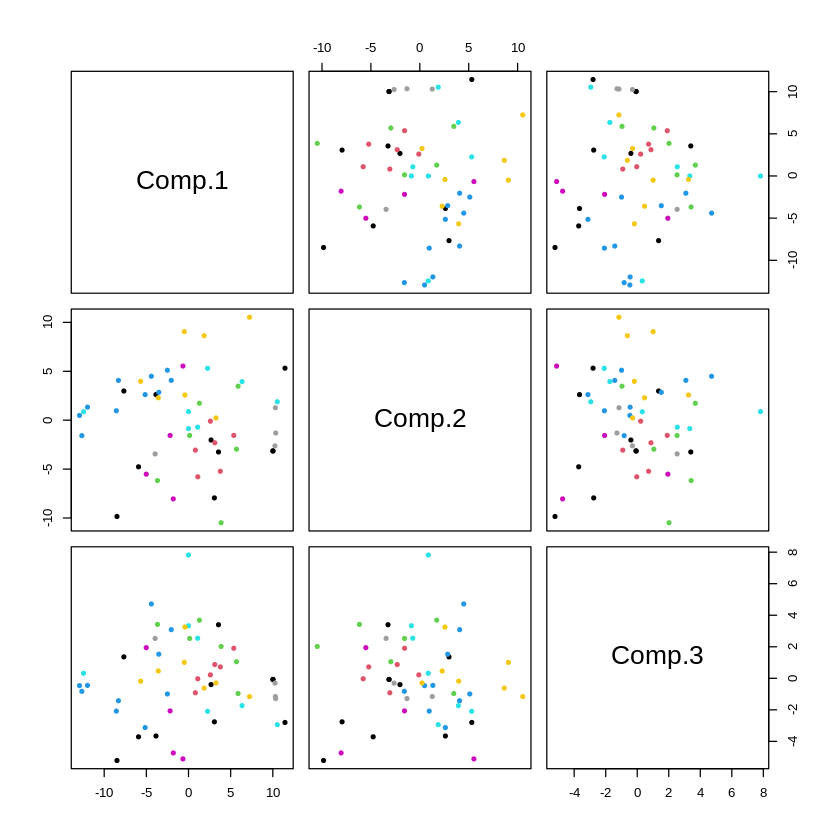

In [16]:
# Load required library
library(MASS)

# Load the painters dataset
data(painters, package = "MASS")

# Extract the scores for Composition, Drawing, Colour, and Expression
painters_scores <- painters[, c("Composition", "Drawing", "Colour", "Expression")]

# Perform principal components analysis
pca_result <- princomp(painters_scores)

# Examine the loadings on the first three principal components
print(pca_result$loadings[, 1:3])

# Plot a scatterplot matrix of the first three principal components
pairs(pca_result$scores[, 1:3], col = painters$School, pch = 20)


2. The data set Cars93 is in the MASS package. Using the columns of continuous or ordinal data, determine
scores on the first and second principal components. Investigate the comparison between (i) USA and non-USA
cars, and (ii) the six different types (Type) of car. Now create a new data set in which binary factors become
columns of 0/1 data, and include these in the principal components analysis

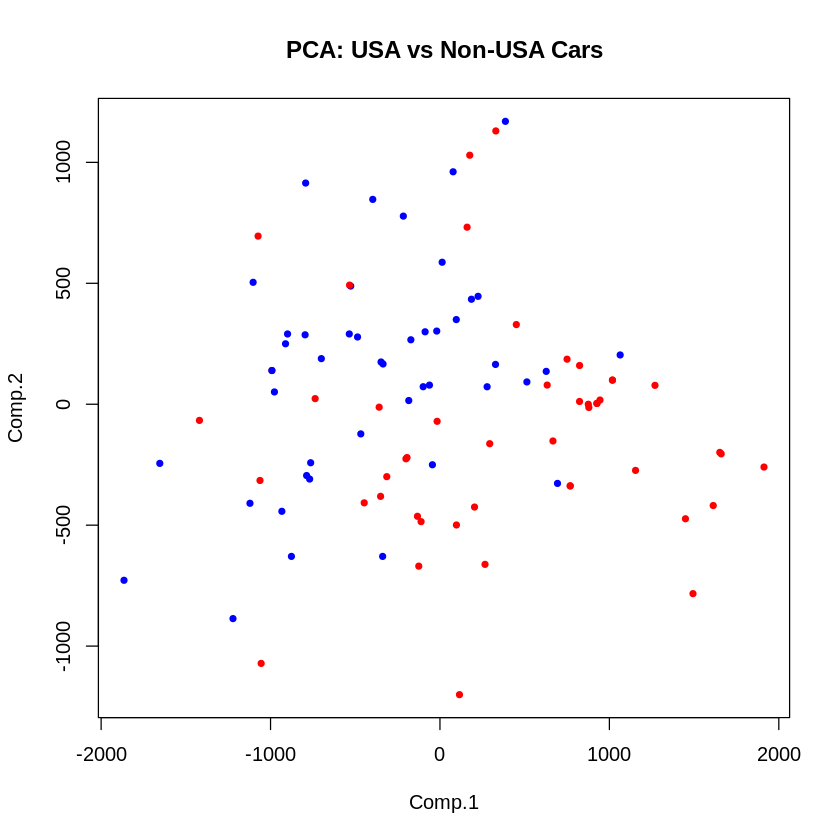

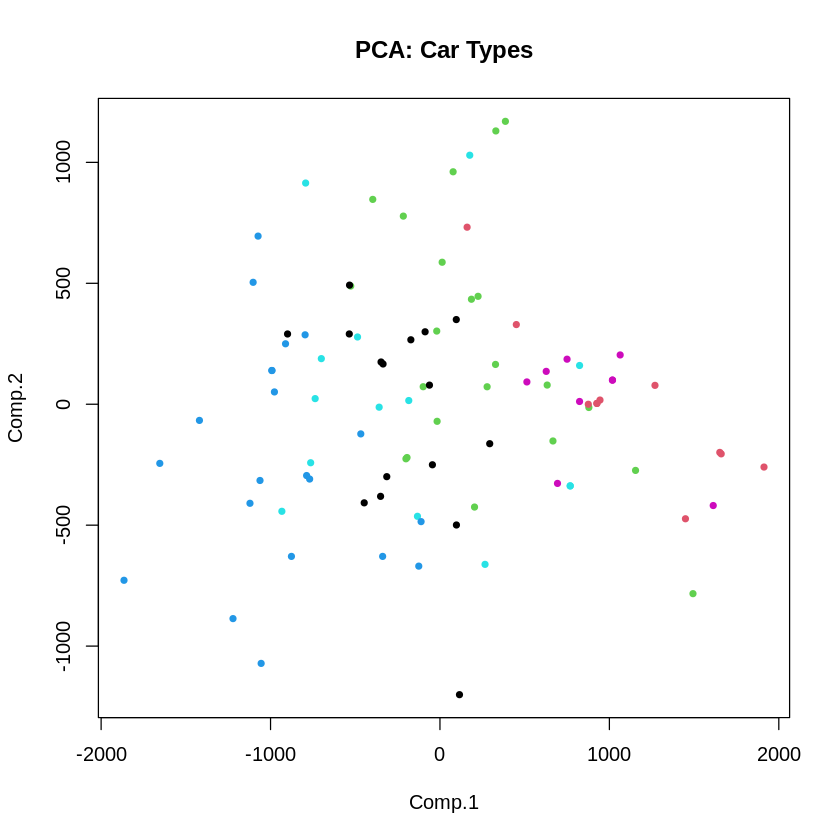

In [18]:
# Load required library
library(MASS)

# Load the Cars93 dataset
data(Cars93, package = "MASS")

# Select columns of continuous or ordinal data
cars_data <- subset(Cars93, select = c("Price", "MPG.city", "MPG.highway", "EngineSize", "Horsepower", "RPM", "Rev.per.mile", "Fuel.tank.capacity", "Length", "Width", "Turn.circle", "Weight"))

# Perform principal components analysis
pca_result <- princomp(cars_data)

# Extract scores on the first and second principal components
scores <- predict(pca_result, newdata = cars_data)[, 1:2]

# Identify whether a car is from the USA or not
comparison_usa <- ifelse(Cars93$Origin == "USA", "red", "blue")  # Use colors for visualization

# Investigate comparison between car types
car_types <- as.factor(Cars93$Type)

# Plot scores with different colors for USA and non-USA cars
plot(scores, col = comparison_usa, pch = 20, main = "PCA: USA vs Non-USA Cars")

# Plot scores with different colors for car types
plot(scores, col = car_types, pch = 20, main = "PCA: Car Types")


3. Repeat the calculations of exercises 1 and 2, but this time using the function lda() from the MASS package
to derive canonical discriminant scores, as in section 6.3.

[1] 15.7578  3.9372  3.1860  1.5078  1.1420  0.7772

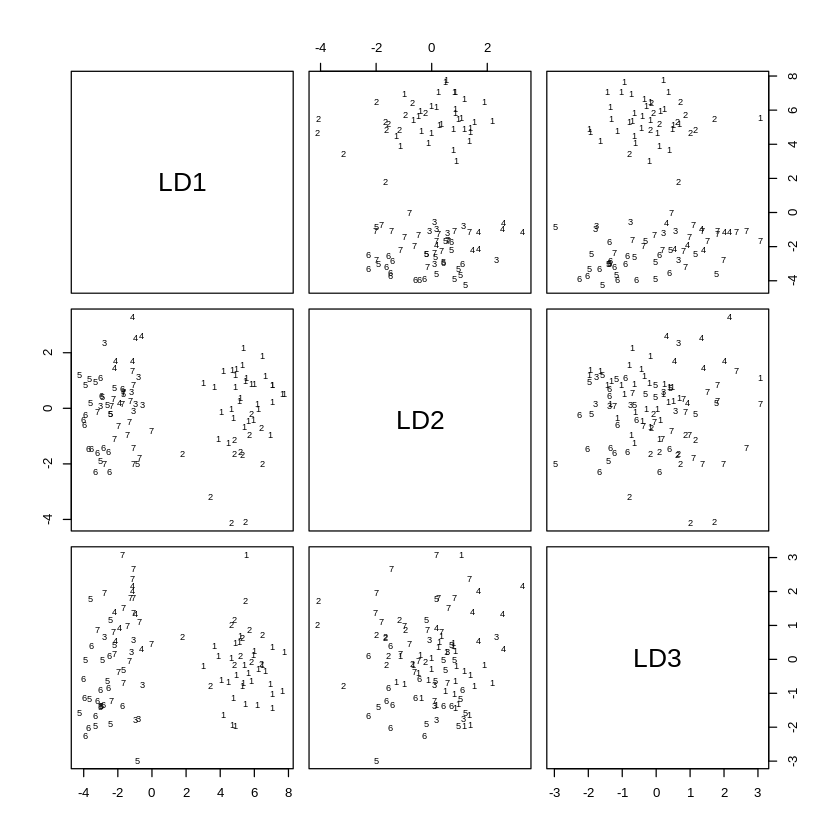

In [20]:
# Load required library
library(MASS)

# Filter out NA values
here <- !is.na(possum$footlgth)

# Perform Linear Discriminant Analysis (LDA)
possum.lda <- lda(site ~ hdlngth + skullw + totlngth +
                     taill + footlgth + earconch + eye + chest + belly,
                   data = possum, subset = here)

# Examine the singular values
options(digits = 4)
possum.lda$svd

# Plot a scatterplot matrix for scores on the first three canonical variates
plot(possum.lda, dimen = 3)


4. The MASS package has the Aids2 data set, containing de-identified data on the survival status of patients
diagnosed with AIDS before July 1 1991. Use tree-based classification (rpart()) to identify major influences
on survival.

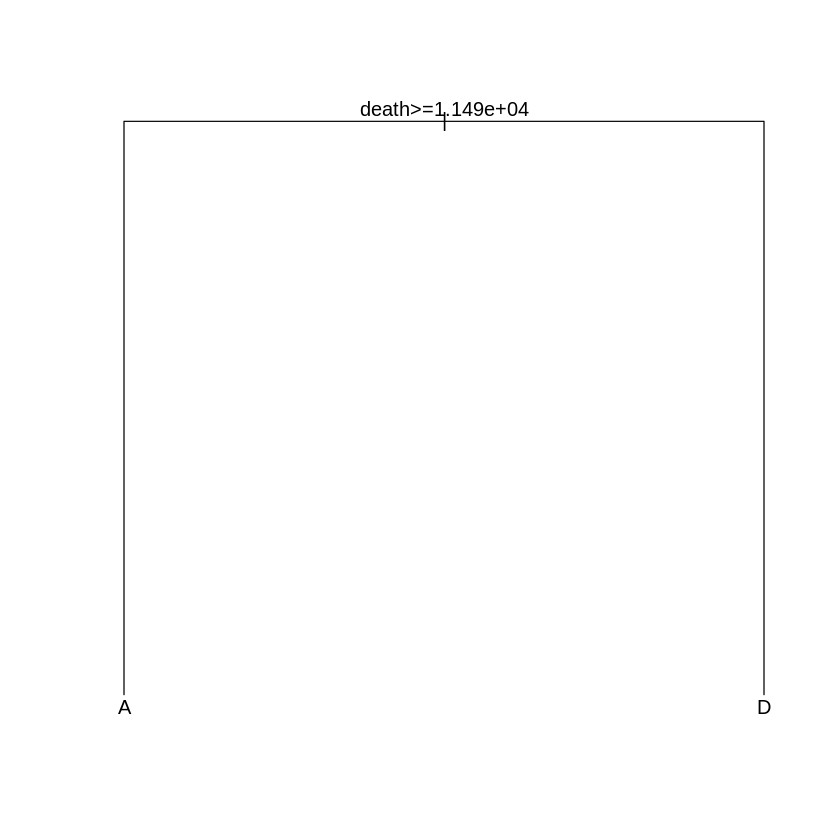

In [23]:
# Load required library
library(MASS)
library(rpart)

# Load the Aids2 dataset
data(Aids2, package = "MASS")

# Perform tree-based classification using rpart()
tree_model <- rpart(status ~ ., data = Aids2)

# Visualize the resulting tree
plot(tree_model)
text(tree_model)


5. Investigate discrimination between plagiotropic and orthotropic species in the data set leafshape34.

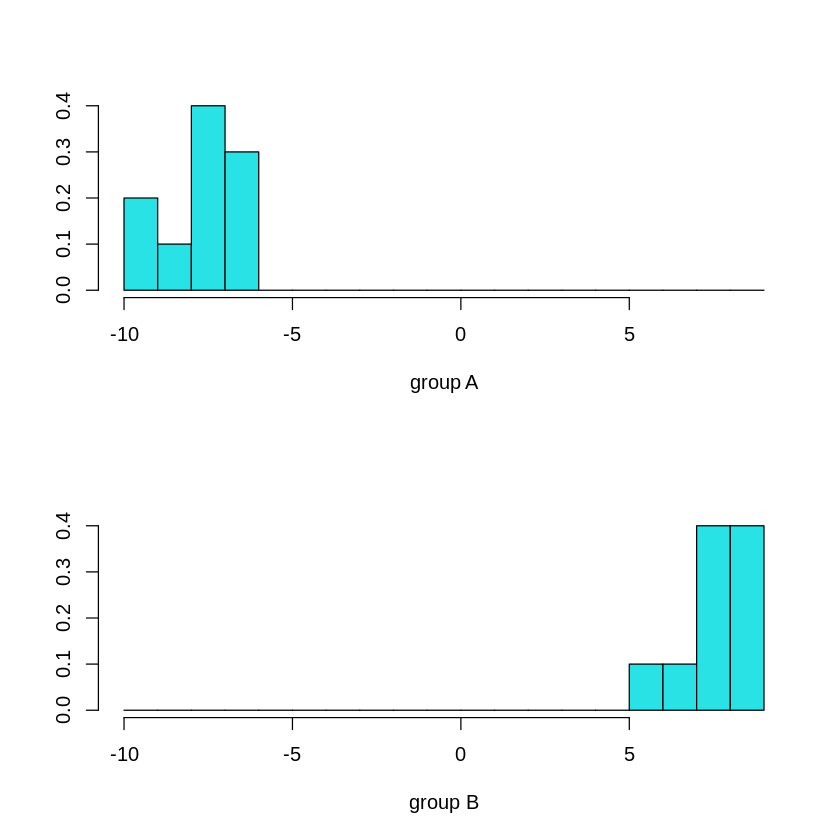

In [25]:
# Load the leafshape dataset
leafshape <- read.csv("/content/Leafshape.csv")

# Perform discriminant analysis
discriminant_model <- lda(Species ~ ., data = leafshape)

# Plot discriminant scores
plot(discriminant_model)
